In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop(columns='Life_expectancy')
y = df_encoded['Life_expectancy']

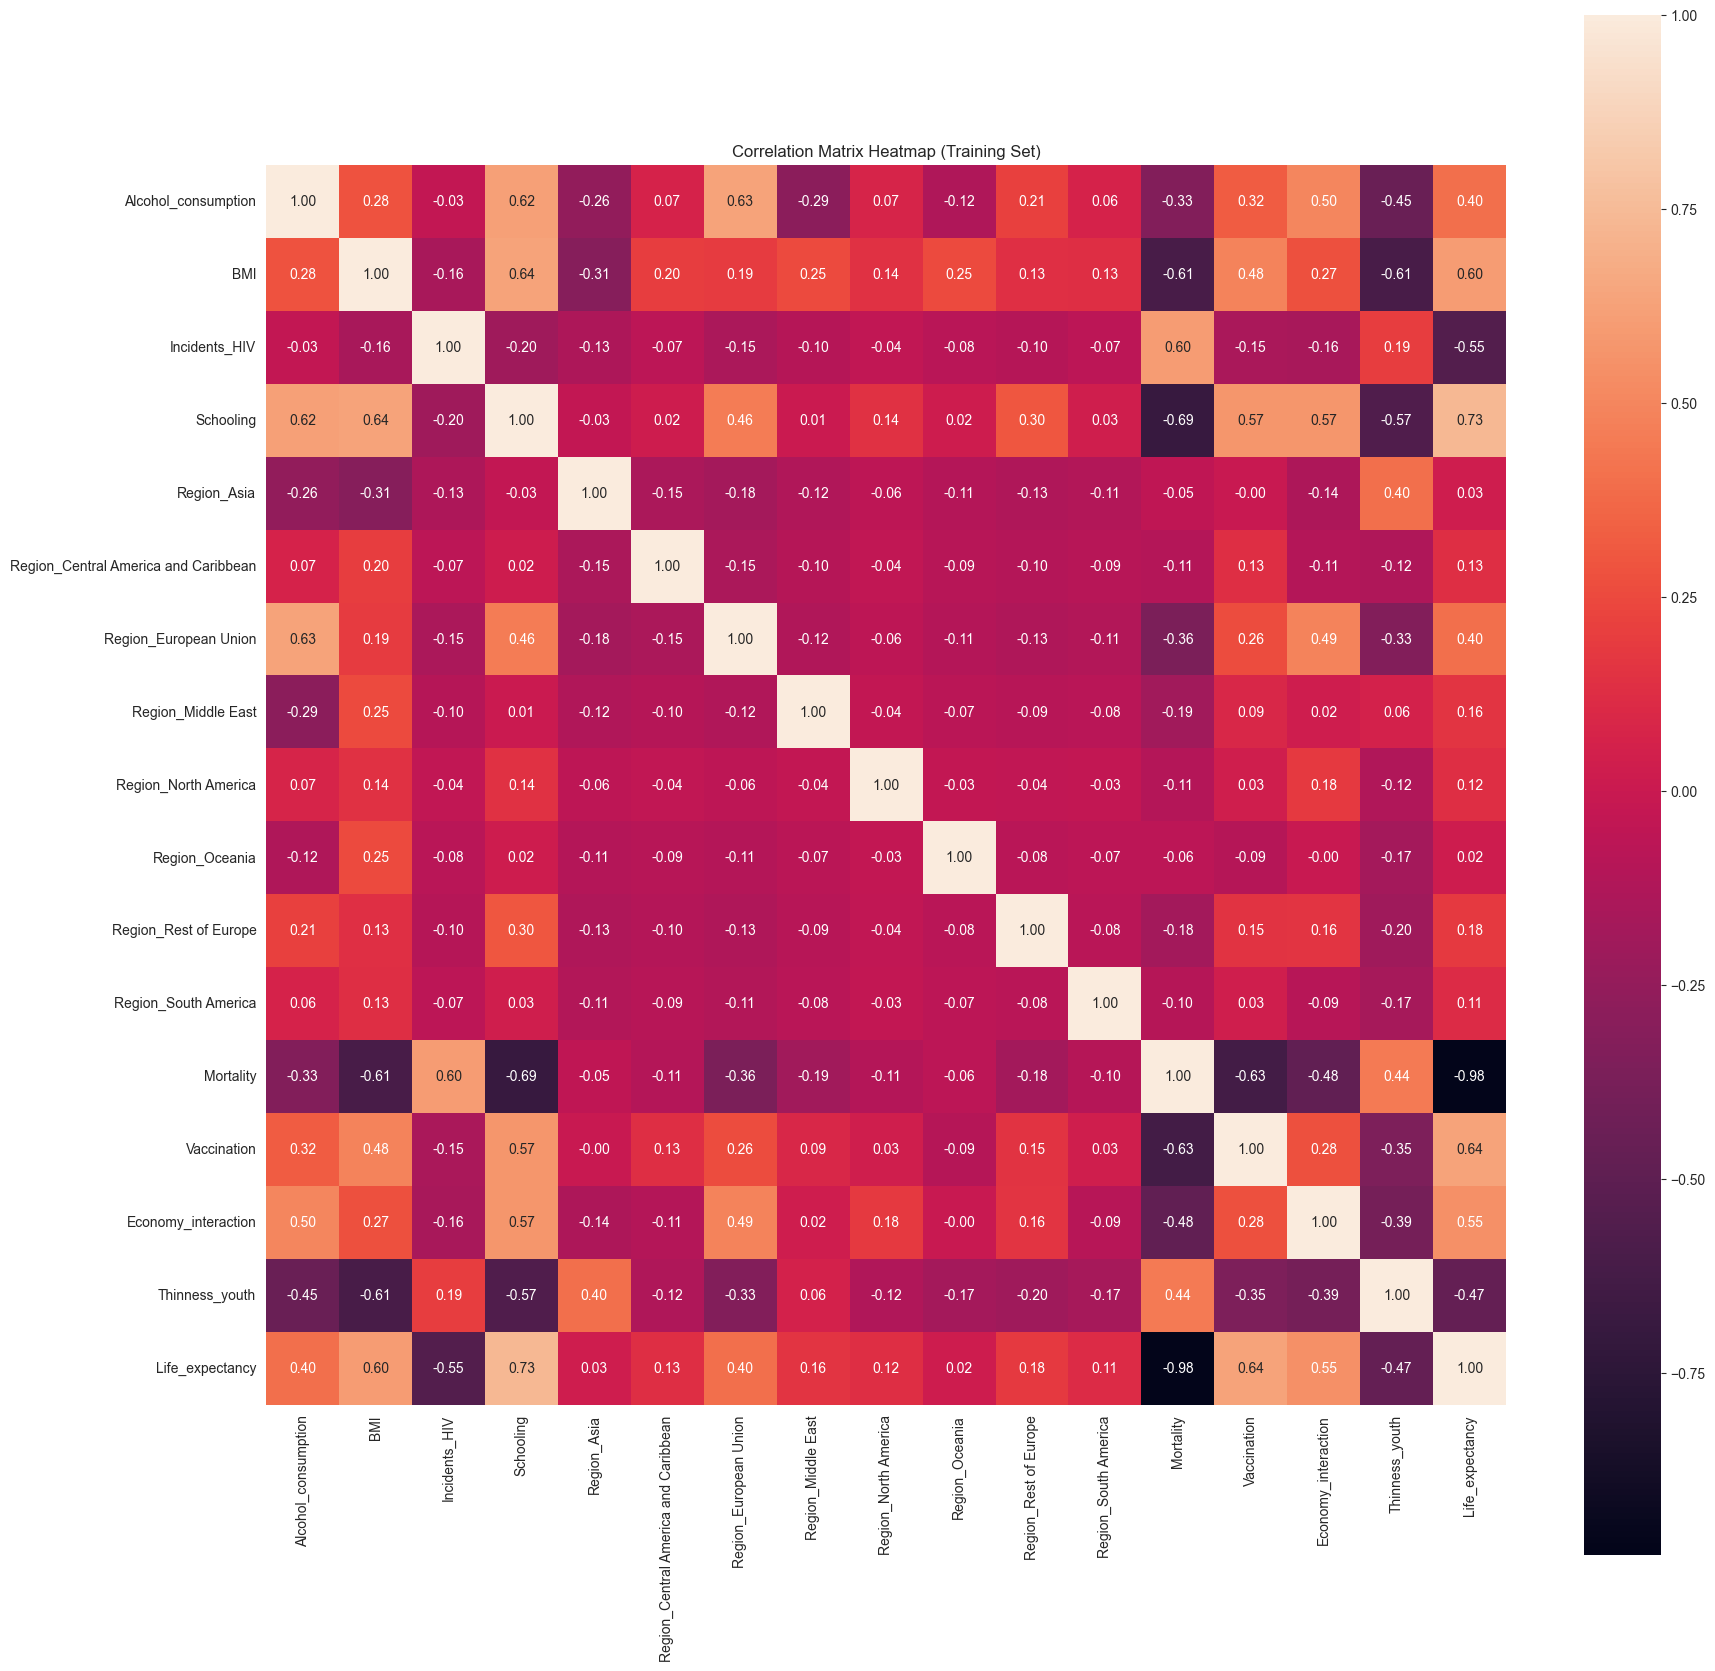

In [21]:
# combine under_five_deaths, infant_deaths, and adult_mortality into a single feature
X['Mortality'] = X['Under_five_deaths'] + X['Infant_deaths'] + X['Adult_mortality']

# Combine Polio, Diphtheria, Measles and Hepatitis B into a single feature
X['Vaccination'] = X['Polio'] + X['Diphtheria'] + X['Measles'] + X['Hepatitis_B']

# Combine GDP per capita and Economy status into a single feature
X['Economy_interaction'] = X['GDP_per_capita'] * (X['Economy_status_Developing'] + 2 * X['Economy_status_Developed'])

# Combine Thinness ten to nineteen years and Thinness five to nine years into a single feature
X['Thinness_youth'] = X['Thinness_ten_nineteen_years'] + X['Thinness_five_nine_years']

# drop the original features
X.drop(columns=['Under_five_deaths', 'Infant_deaths', 'Adult_mortality', 'Polio', 'Diphtheria', 'Measles',
                'Hepatitis_B', 'GDP_per_capita', 'Economy_status_Developed', 'Economy_status_Developing', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years'], inplace=True)

# Drop features with little to no correlation with the target variable
X.drop(columns=['Year', 'Country', 'Population_mln'], inplace=True)

df_encoded_with_target = pd.concat([X, y], axis=1)

correlation_matrix = df_encoded_with_target.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap (Training Set)')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Recalculate the error metrics using the inverse-transformed values
mae_rf_inv = mean_absolute_error(y_test, y_pred_rf)
mse_rf_inv = mean_squared_error(y_test, y_pred_rf)
r2_rf_inv = r2_score(y_test, y_pred_rf)

# Print the recalculated evaluation metrics
print("Random Forest Regression Results on Original Scale:")
print(f"Mean Absolute Error (MAE): {mae_rf_inv:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_inv:.4f}")
print(f"R² Score: {r2_rf_inv:.4f}")

Random Forest Regression Results on Original Scale:
Mean Absolute Error (MAE): 0.4255
Mean Squared Error (MSE): 0.3548
R² Score: 0.9957
